In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import time
import datetime
import requests
import requests
from bs4 import BeautifulSoup
import tqdm
import ast

import os
import sys

import utilities as utils

import matplotlib.pyplot as plt

print(datetime.datetime.now())
print('pandas:', pd.__version__)
print('executable:', sys.executable)


# LOCAL FILE DIRECTORY
data_dir = '/Users/joeybortfeld/Documents/CreditGradients Data/'

2024-11-08 12:15:22.076623
pandas: 2.2.1
executable: /Users/joeybortfeld/opt/anaconda3/envs/investment_analysis/bin/python


## Download Fundamental Data by Company using FinancialModelingPrep API

In [87]:
# collect sp500 constituents
df_sp500 = utils.get_sp500_universe()
tickers_sp500 = df_sp500['symbol'].tolist()

print('sp500 count:', len(tickers_sp500))
print()

# download financial statement data for specified ticker
this_ticker = 'A'
df1 = utils.get_financial_statement(ticker=this_ticker, statement='income', period='annual')
df2 = utils.get_financial_statement(ticker=this_ticker, statement='balance-sheet', period='annual')
df3 = utils.get_financial_statement(ticker=this_ticker, statement='cash-flow', period='annual')

print('income statement columns:')
print(df1.columns)
print()

print('balance sheet columns:')
print(df2.columns)
print()

print('cash flow statement columns:')
print(df3.columns)
print()

print('done all')

sp500 count: 503

income statement columns:
Index(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
       'acceptedDate', 'calendarYear', 'period', 'revenue', 'costOfRevenue',
       'grossProfit', 'grossProfitRatio', 'researchAndDevelopmentExpenses',
       'generalAndAdministrativeExpenses', 'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestIncome',
       'interestExpense', 'depreciationAndAmortization', 'ebitda',
       'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink',
       'data_download_timestamp'],
      dtype='object')

balance sheet columns:
Index(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
  

In [4]:
# build income statement, balance sheet, and cash flow statement for specified ticker
df, column_dict = utils.build_company_financials(ticker='AAPL', period='quarter')
print('duplicate count:', df.duplicated(subset='date', keep=False).sum())



duplicate count: 0


In [27]:
build_quarterly_financials_pipeline = False
build_annual_financials_pipeline = False

if build_quarterly_financials_pipeline:
    # build income statement, balance sheet, and cash flow statement for a set of tickers
    # - download both annual and quarterly data
    # - in the event of a failure to download, retry all failed tickers once at the end
    # - failures are due to the API sometimes not returning data

    print('start quarterly financial download at ', datetime.datetime.now())
    df_quarterly, fail_quarterly = utils.bulk_build_company_financials(tickers=tickers_sp500, period='quarter', verbose=True)
    if len(fail_quarterly) > 0:
        temp, fail_quarterly = utils.bulk_build_company_financials(tickers=fail_quarterly, period='quarter', verbose=True)
        if temp.shape[0] > 0:
            df_quarterly = pd.concat([df_quarterly, temp], axis=0)

    print('-failed quarterly ticker count:', len(fail_quarterly))
    print('--done quarterly financial download at ', datetime.datetime.now())
    df_quarterly.to_csv(data_dir + 'sp500_subset_sample_financials_quarterly.csv', index=False)
    print('--done quarterly financial write at ', datetime.datetime.now())
    time.sleep(10)
    print()
else:
    start = time.time()
    df_quarterly = pd.read_csv(data_dir + 'sp500_subset_sample_financials_quarterly.csv')
    print('done read quarterly in {:.2f}s'.format(time.time() - start))

if build_annual_financials_pipeline:
    print('start annual financial download at ', datetime.datetime.now())

    df_annual, fail_annual = utils.bulk_build_company_financials(tickers=tickers_sp500, period='annual', verbose=True)
    
    # 1st round of retries
    print('-1st round of retries')
    if len(fail_annual) > 0:
        time.sleep(10)
        temp, fail_annual = utils.bulk_build_company_financials(tickers=fail_annual, period='annual', verbose=True)
        if temp.shape[0] > 0:
            df_annual = pd.concat([df_annual, temp], axis=0)
        
    # 2nd round of retries
    print('-2nd round of retries')
    if len(fail_annual) > 0:
        time.sleep(10)
        temp, fail_annual = utils.bulk_build_company_financials(tickers=fail_annual, period='annual', verbose=True)
        if temp.shape[0] > 0:
            df_annual = pd.concat([df_annual, temp], axis=0)
        
    print()
    print('-failed annual ticker count:', len(fail_annual))
    print('--done annual financial download at ', datetime.datetime.now())
    df_annual.to_csv(data_dir + 'sp500_subset_sample_financials_annual.csv', index=False)
    print('--done annual financial write at ', datetime.datetime.now())
    print('done all')

else:
    start = time.time()
    df_annual = pd.read_csv(data_dir + 'sp500_subset_sample_financials_annual.csv')
    print('done read annual in {:.2f}s'.format(time.time() - start))



done read quarterly in 0.51s
start annual financial download at  2024-09-29 15:00:43.235224
start bulk_build_company_financials for 503 tickers


 27%|██▋       | 135/503 [01:14<02:36,  2.36it/s]

error in build_company_financials with CTRA
error in build_company_financials with CRWD


 27%|██▋       | 137/503 [01:14<01:42,  3.58it/s]

error in build_company_financials with CCI
error in build_company_financials with CMI


 28%|██▊       | 139/503 [01:14<01:12,  5.00it/s]

error in build_company_financials with DHI
error in build_company_financials with DTE


 28%|██▊       | 141/503 [01:15<01:00,  5.96it/s]

error in build_company_financials with DVA
error in build_company_financials with DHR


 28%|██▊       | 143/503 [01:15<01:06,  5.43it/s]

error in build_company_financials with DRI
error in build_company_financials with DAY


 29%|██▉       | 145/503 [01:15<00:56,  6.37it/s]

error in build_company_financials with DECK
error in build_company_financials with DE


 29%|██▉       | 147/503 [01:16<00:53,  6.69it/s]

error in build_company_financials with DELL
error in build_company_financials with DAL


 30%|██▉       | 149/503 [01:16<00:47,  7.49it/s]

error in build_company_financials with DVN
error in build_company_financials with DXCM


 50%|████▉     | 251/503 [02:10<03:07,  1.34it/s]

error in build_company_financials with IR
error in build_company_financials with PODD


 50%|█████     | 253/503 [02:11<01:49,  2.28it/s]

error in build_company_financials with INTC
error in build_company_financials with ICE


 51%|█████     | 255/503 [02:11<01:10,  3.52it/s]

error in build_company_financials with IFF
error in build_company_financials with IP


 51%|█████     | 257/503 [02:11<00:50,  4.84it/s]

error in build_company_financials with IPG
error in build_company_financials with INTU


 51%|█████▏    | 259/503 [02:12<00:41,  5.87it/s]

error in build_company_financials with ISRG
error in build_company_financials with IVZ


 52%|█████▏    | 261/503 [02:12<00:36,  6.62it/s]

error in build_company_financials with INVH
error in build_company_financials with IRM


 52%|█████▏    | 263/503 [02:12<00:34,  7.00it/s]

error in build_company_financials with JBHT
error in build_company_financials with SJM


 53%|█████▎    | 265/503 [02:12<00:33,  7.04it/s]

error in build_company_financials with JPM
error in build_company_financials with JBL


 53%|█████▎    | 267/503 [02:13<00:34,  6.89it/s]

error in build_company_financials with JKHY
error in build_company_financials with J


 53%|█████▎    | 269/503 [02:13<00:32,  7.28it/s]

error in build_company_financials with JNJ
error in build_company_financials with JCI


 54%|█████▍    | 271/503 [02:13<00:31,  7.33it/s]

error in build_company_financials with JNPR
error in build_company_financials with KKR


 54%|█████▍    | 273/503 [02:13<00:30,  7.47it/s]

error in build_company_financials with KLAC
error in build_company_financials with K


 55%|█████▍    | 275/503 [02:14<00:33,  6.82it/s]

error in build_company_financials with KVUE
error in build_company_financials with KDP


 55%|█████▌    | 277/503 [02:14<00:34,  6.58it/s]

error in build_company_financials with KEY
error in build_company_financials with KEYS


 55%|█████▌    | 279/503 [02:14<00:30,  7.34it/s]

error in build_company_financials with KMB
error in build_company_financials with KIM


 56%|█████▌    | 281/503 [02:15<00:29,  7.43it/s]

error in build_company_financials with KMI
error in build_company_financials with KHC


 56%|█████▋    | 283/503 [02:15<00:29,  7.47it/s]

error in build_company_financials with KR
error in build_company_financials with LHX


 57%|█████▋    | 285/503 [02:15<00:27,  7.89it/s]

error in build_company_financials with LKQ
error in build_company_financials with LH


 57%|█████▋    | 287/503 [02:15<00:31,  6.85it/s]

error in build_company_financials with LRCX
error in build_company_financials with LW


 57%|█████▋    | 289/503 [02:16<00:29,  7.19it/s]

error in build_company_financials with LVS
error in build_company_financials with LDOS


 58%|█████▊    | 291/503 [02:16<00:27,  7.59it/s]

error in build_company_financials with LEN
error in build_company_financials with LLY


 58%|█████▊    | 293/503 [02:16<00:26,  7.82it/s]

error in build_company_financials with LIN
error in build_company_financials with LYV


 59%|█████▊    | 295/503 [02:16<00:26,  7.74it/s]

error in build_company_financials with LMT
error in build_company_financials with L


 59%|█████▉    | 297/503 [02:17<00:27,  7.63it/s]

error in build_company_financials with LOW
error in build_company_financials with LULU


 59%|█████▉    | 298/503 [02:17<00:26,  7.69it/s]

error in build_company_financials with LYB


 79%|███████▉  | 399/503 [03:11<01:04,  1.62it/s]

error in build_company_financials with REGN


 80%|███████▉  | 401/503 [03:13<01:20,  1.26it/s]

error in build_company_financials with RF
error in build_company_financials with RSG


 80%|████████  | 403/503 [03:13<00:45,  2.21it/s]

error in build_company_financials with RMD
error in build_company_financials with RVTY


 81%|████████  | 405/503 [03:14<00:27,  3.57it/s]

error in build_company_financials with ROK
error in build_company_financials with ROL


 81%|████████  | 407/503 [03:14<00:19,  5.03it/s]

error in build_company_financials with ROP
error in build_company_financials with ROST


 81%|████████▏ | 409/503 [03:15<00:23,  3.94it/s]

error in build_company_financials with RCL
error in build_company_financials with SPGI


 82%|████████▏ | 411/503 [03:15<00:17,  5.20it/s]

error in build_company_financials with SBAC
error in build_company_financials with CRM


 82%|████████▏ | 413/503 [03:15<00:14,  6.41it/s]

error in build_company_financials with SLB
error in build_company_financials with STX


 83%|████████▎ | 415/503 [03:15<00:13,  6.60it/s]

error in build_company_financials with SRE
error in build_company_financials with NOW


 83%|████████▎ | 416/503 [03:15<00:12,  6.93it/s]

error in build_company_financials with SHW


 83%|████████▎ | 418/503 [03:16<00:12,  6.88it/s]

error in build_company_financials with SPG
error in build_company_financials with SWKS


 83%|████████▎ | 420/503 [03:16<00:10,  7.57it/s]

error in build_company_financials with SW
error in build_company_financials with SNA


 84%|████████▍ | 422/503 [03:16<00:10,  7.49it/s]

error in build_company_financials with SOLV
error in build_company_financials with SO


 84%|████████▍ | 424/503 [03:17<00:10,  7.64it/s]

error in build_company_financials with LUV
error in build_company_financials with SWK


 85%|████████▍ | 426/503 [03:17<00:09,  7.91it/s]

error in build_company_financials with SBUX
error in build_company_financials with STT


100%|██████████| 503/503 [04:00<00:00,  2.09it/s]


--done all in 241.03s
-1st round of retries
start bulk_build_company_financials for 93 tickers


 27%|██▋       | 25/93 [00:12<00:25,  2.68it/s]

error in build_company_financials with INTU
error in build_company_financials with ISRG


 29%|██▉       | 27/93 [00:12<00:16,  4.05it/s]

error in build_company_financials with IVZ
error in build_company_financials with INVH


 31%|███       | 29/93 [00:12<00:11,  5.59it/s]

error in build_company_financials with IRM
error in build_company_financials with JBHT


 33%|███▎      | 31/93 [00:13<00:09,  6.61it/s]

error in build_company_financials with SJM
error in build_company_financials with JPM


 35%|███▌      | 33/93 [00:13<00:08,  7.39it/s]

error in build_company_financials with JBL
error in build_company_financials with JKHY


 38%|███▊      | 35/93 [00:13<00:07,  7.91it/s]

error in build_company_financials with J
error in build_company_financials with JNJ


 40%|███▉      | 37/93 [00:13<00:07,  7.42it/s]

error in build_company_financials with JCI
error in build_company_financials with JNPR


 42%|████▏     | 39/93 [00:14<00:06,  7.77it/s]

error in build_company_financials with KKR
error in build_company_financials with KLAC


 44%|████▍     | 41/93 [00:14<00:06,  7.93it/s]

error in build_company_financials with K
error in build_company_financials with KVUE


 46%|████▌     | 43/93 [00:14<00:06,  7.59it/s]

error in build_company_financials with KDP
error in build_company_financials with KEY


 48%|████▊     | 45/93 [00:14<00:06,  7.66it/s]

error in build_company_financials with KEYS
error in build_company_financials with KMB


 51%|█████     | 47/93 [00:15<00:05,  8.24it/s]

error in build_company_financials with KIM
error in build_company_financials with KMI


 53%|█████▎    | 49/93 [00:15<00:05,  7.76it/s]

error in build_company_financials with KHC
error in build_company_financials with KR


100%|██████████| 93/93 [00:39<00:00,  2.34it/s]


--done all in 39.82s
-2nd round of retries
start bulk_build_company_financials for 26 tickers


100%|██████████| 26/26 [00:12<00:00,  2.10it/s]


--done all in 12.41s

-failed annual ticker count: 0
--done annual financial download at  2024-09-29 15:05:36.521301
--done annual financial write at  2024-09-29 15:05:37.181546
done all


In [2]:
build_merged_financials_pipeline = False

if build_merged_financials_pipeline:
    # get fundamental variable classifications - stock vs flow variables
    temp = pd.read_csv(data_dir + 'fmp_fundamental_var_classifications.csv')
    fmp_var_dict = {}

    fmp_var_dict['ltm_flow'] = temp[temp['ltm'] == 'x'].item.tolist()
    fmp_var_dict['stock'] = temp[temp['stock'] == 'x'].item.tolist()

    # merge annual and quarterly data into single dataframe
    temp1 = utils.format_quarterly_data(df_quarterly, ltm_vars=fmp_var_dict['ltm_flow'])
    temp2 = utils.format_annual_data(df_annual)
    temp3 = utils.merge_quarterly_annual(temp1, temp2,
                                ltm_vars=fmp_var_dict['ltm_flow'], 
                                stock_vars=fmp_var_dict['stock'],
                                cleanup=True)
    temp3.to_csv(data_dir + 'sp500_subset_sample_financials_annual_and_quarterly_merged.csv', index=False)

else:
    start = time.time()

    # get fundamental variable classifications - stock vs flow variables
    temp = pd.read_csv(data_dir + 'fmp_fundamental_var_classifications.csv')
    fmp_var_dict = {}

    fmp_var_dict['ltm_flow'] = temp[temp['ltm'] == 'x'].item.tolist()
    fmp_var_dict['stock'] = temp[temp['stock'] == 'x'].item.tolist()

    df_merged = pd.read_csv(data_dir + 'sp500_subset_sample_financials_annual_and_quarterly_merged.csv')
    print('done read merged in {:.2f}s'.format(time.time() - start))

print('done')

done read merged in 0.51s
done


df2

In [27]:
print('symbol count:',df_merged['symbol'].nunique())
print('column count:',df_merged.shape[1])
print()


temp = utils.build_lseg_ratios(data=df_merged)


print('done')


symbol count: 503
column count: 140

done


In [69]:
import requests
import credentials

API_KEY = credentials.fmp_api_key
BASE_URL = 'https://financialmodelingprep.com/api/v3'
THRESHOLD = 10_000_000_000  # $10 billion

def all_symbols():

    # Get the list of symbols
    symbols_url = f'https://financialmodelingprep.com/api/v3/financial-statement-symbol-lists'
    params = {
        "apikey": API_KEY
    }
    response = requests.get(symbols_url, params=params)
    symbols = response.json()  # List of all symbols
    return symbols

def get_symbols_with_high_assets(symbols_list:list):

    params = {
        "apikey": API_KEY
    }

    collection = []
    for this_symbol in tqdm.tqdm(symbols_list):

        # Get balance sheet data for this symbol
        balance_sheet_url = f"{BASE_URL}/balance-sheet-statement/{this_symbol}"
        response = requests.get(balance_sheet_url, params=params)

        if response.ok:

            data = response.json()
            if len(data) > 0:
                df = pd.DataFrame(data)
                df = df.sort_values(by='date')
                df = df[df['totalAssets'].notnull()]
                if df.shape[0] > 0:
                    df = df.tail(1)[['symbol', 'date', 'reportedCurrency', 'totalAssets']]
                    collection.append(df)

    df_large_assets = pd.concat(collection, axis=0)

    return df_large_assets

# Example usage
start = time.time()
all_symbols_list = all_symbols()
print(len(all_symbols_list))
df_all_symbols = pd.DataFrame(all_symbols_list, columns=['symbol'])
df_all_symbols = df_all_symbols.sort_values(by='symbol')
df_all_symbols = df_all_symbols.reset_index(drop=True)
df_all_symbols.to_csv(data_dir + 'fmp_all_symbols_w_statements.csv', index=False)

df_all_symbols


66486


,symbol
0,000001.SZ
1,000002.SZ
2,000004.SZ
3,000005.SZ
4,000006.SZ
...,...
66481,ZZHGF
66482,ZZHGY
66483,ZZLL
66484,ZZZ.TO


In [78]:
df_all_symbols = pd.read_csv(data_dir + 'fmp_all_symbols_w_statements.csv')

# filter out symbols that start with a number and unlikely to be target companies
mask = df_all_symbols['symbol'].map(lambda x: str(x)[0] in ['0','1','2','3','4','5','6','7','8','9'] )
df_all_symbols = df_all_symbols[-mask]

mask = df_all_symbols['symbol'].map(lambda x: '.' in str(x) )
df_all_symbols = df_all_symbols[-mask]

df_all_symbols = df_all_symbols.sort_values(by='symbol')
df_all_symbols = df_all_symbols.reset_index(drop=True)
symbol_count = df_all_symbols.shape[0]
print('symbol count:', symbol_count)


# divide the symbol list into chunks of 1_000 companies each
chunk_size=1_000
chunk_count = symbol_count // chunk_size

for i in [26]:

    try:
        print(f'chunk {i} of {chunk_count} at {datetime.datetime.now()}')
        this_chunk = df_all_symbols[i*chunk_size:(i+1)*chunk_size]
        df = get_symbols_with_high_assets(this_chunk['symbol'].tolist())
        df['totalAssets'] /= 1_000_000_000
        df.to_csv(data_dir + f'fmp_large_assets_{i}.csv', index=False)
        time.sleep(3)
    except:
        print(f'error on chunk {i}')


print('done in {:.2f}s'.format(time.time() - start))



symbol count: 25812
chunk 26 of 25 at 2024-10-10 16:26:20.395880


0it [00:00, ?it/s]

error on chunk 26
done in 6738.96s


In [85]:
collection = []

for i in tqdm.tqdm(range(25)):
    df = pd.read_csv(data_dir + f'fmp_large_assets_{i}.csv')
    collection.append(df)

df = pd.concat(collection, axis=0)
# df = df[df['reportedCurrency'] == 'USD']
df = df.sort_values(by='totalAssets', ascending=False)
df = df.reset_index(drop=True)
# df = df[df['totalAssets'] > 10]
df = df[df['date'] >= '2022-12-31']
df['date'].value_counts()








100%|██████████| 25/25 [00:00<00:00, 993.81it/s]


date
2023-12-31    10121
2022-12-31     1855
2024-03-31      948
2024-06-30      525
2023-09-30      518
              ...  
2023-12-26        1
2023-09-02        1
2024-01-27        1
2024-02-23        1
2024-02-28        1
Name: count, Length: 78, dtype: int64

In [113]:
results = []
error_list = []
for this_ticker in tqdm.tqdm(tickers_sp500):

    this_result = utils.get_company_profile(ticker=this_ticker)

    try:
        this_symbol = this_result['symbol']
        this_profile = this_result['profile']
        this_name = this_profile['companyName']
        this_description = this_profile['description']
        this_industry = this_profile['industry']
        this_sector = this_profile['sector']
        this_country = this_profile['country']

        results.append([this_symbol, this_name, this_description, this_industry, this_sector, this_country])
    except:
        error_list.append(this_ticker)

for this_ticker in tqdm.tqdm(error_list):

    this_result = utils.get_company_profile(ticker=this_ticker)

    try:
        this_symbol = this_result['symbol']
        this_profile = this_result['profile']
        this_name = this_profile['companyName']
        this_description = this_profile['description']
        this_industry = this_profile['industry']
        this_sector = this_profile['sector']
        this_country = this_profile['country']

        results.append([this_symbol, this_name, this_description, this_industry, this_sector, this_country])
    except:
        print(f'error on {this_ticker}')


df_company_profiles = pd.DataFrame(results, columns=['symbol', 'name', 'description', 'industry', 'sector', 'country'])
df_company_profiles.to_csv(data_dir + 'fmp_company_profiles.csv', index=False)




100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


In [154]:
import openai
print(openai.__version__)


openai_api_key = credentials.openai_api_key
df_company_profiles = pd.read_csv(data_dir + 'fmp_company_profiles.csv')

# get unique industry and sector classes
industry_classes = df_company_profiles['industry'].unique().tolist()
sector_classes = df_company_profiles['sector'].unique().tolist()
print('industry class count:', len(industry_classes))
print('sector class count:', len(sector_classes))
print()

this_des = df_company_profiles['description'].tolist()[5]
this_name = df_company_profiles['name'].tolist()[5]
this_industry = df_company_profiles['industry'].tolist()[5]

# censor the company name from the description to prevent leakage 
this_des = this_des.replace(this_name, 'XXX')


1.51.2
industry class count: 114
sector class count: 11



In [155]:
openai_api_key = credentials.openai_api_key
client=openai.OpenAI(api_key=openai_api_key)

# Function to classify company into sectors
def classify_company(description, sectors):
    
    prompt = f"Given the following company description, classify the company into one of these sectors: {', '.join(sectors)}.\n\nDescription: {description}\n\nSector:\n\nLimit your response to one of the sectors provided without any additional text."

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # Use the model of your choice, gpt-4 or gpt-3.5-turbo
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,
        temperature=0
    )

    classification = response['choices'][0]['message']['content'].strip()
    return classification

# Get classification for a sample company
this_classification = classify_company(this_des, industry_classes)
print(f"Classified Sector: {this_classification}")
print('--actual class:', this_industry)


this_classification = classify_company(this_des, industry_classes)
print(f"Classified Sector: {this_classification}")
print('--actual class:', this_industry)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [196]:



from anthropic import Anthropic

def classify_sector_from_description_anthropic(description, classes):

    client = Anthropic(api_key=my_api_key)

    response = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=1000,
    messages=[
        {"role": "user", 
         "content": f'''Given the following company description, classify the company into one of these 
         sectors: {', '.join(sector_classes)}.\n\nDescription: {this_des}\n\nSector:\n\n
         Provide your response as a tuple where the first element is one of the sectors provided,
         the second element is a measure of confidence in the classification from 0 to 100 and the third
         element is your next best classification. Your response should just be the tuple and no other text'''}
        ]
    )

    text_response = response.content[0].text
    return ast.literal_eval(text_response)

results = []
for this_row in df_company_profiles.iterrows():

    if this_row[0] % 50 == 0:
        print('--', this_row[0])

    this_des = this_row[1]['description']
    this_symbol = this_row[1]['symbol']
    this_name = this_row[1]['name']
    this_industry = this_row[1]['industry']
    this_sector = this_row[1]['sector']


    # censor the company name from the description to prevent leakage 
    this_des = this_des.replace(this_name, 'XXX')
    try:
        llm_result = classify_sector_from_description_anthropic(this_des, sector_classes)
        this_classification = llm_result[0]
        this_confidence = llm_result[1]
        this_next_best = llm_result[2]

        this_classification = [this_symbol, this_classification, this_confidence, this_next_best]
        results.append(this_classification)
    except:
        print(f'error on {this_symbol}')

results = pd.DataFrame(results, columns=['symbol', 'classification', 'confidence', 'next_best'])
results = df_company_profiles.merge(results, how='outer', on='symbol')
print((results['sector'] == results['classification']).mean())

-- 0
-- 50
error on BRO
-- 100
error on CNC
error on CI
error on DHI
-- 150
error on DG
error on FIS
-- 200
-- 250
error on IP
error on KKR
-- 300
-- 350
error on UHS
error on WEC
-- 400
error on MS
-- 450
error on PHM
error on QCOM
-- 500
0.8190854870775348


In [198]:
results.to_csv(data_dir + 'fmp_company_profiles_with_llm_classifications.csv', index=False)

In [124]:

this_symbol = 'GOOGL'
params = {
        "apikey": API_KEY
    }

balance_sheet_url = f"{BASE_URL}/balance-sheet-statement/{this_symbol}"
response = requests.get(balance_sheet_url, params=params)
data = response.json()
df = pd.DataFrame(data)
df = df.sort_values(by='date')
df.tail(1)[['symbol', 'date', 'totalAssets']]

,symbol,date,totalAssets
0,GOOGL,2023-12-31,402392000000


In [42]:
response.ok

True

In [45]:
import credentials
ticker = 'GOOGL'


def download_market_cap(ticker='GOOGL', start_date='2020-01-01'):
        
    url = f'https://financialmodelingprep.com/api/v3/historical-market-capitalization/{ticker}?from=2000-01-01'
    params = {
        "apikey": credentials.fmp_api_key,
        "from": start_date  # Set the start date to 1990-01-01
    }

    # Send GET request to the API
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')

    return df

start = time.time()
df = download_market_cap(ticker='MSFT', start_date='1990-01-01')
print(time.time() - start)




0.2280867099761963


<Axes: xlabel='date'>

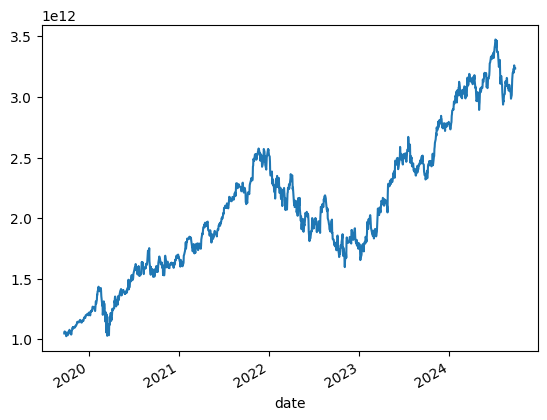

In [46]:
df.set_index('date')['marketCap'].plot()

In [37]:

# url = 'https://financialmodelingprep.com/api/v3/historical-market-capitalization/AAPL?limit=100&from=2023-10-10&to=2023-12-10'

start_date='2024-01-01'
url = 'https://financialmodelingprep.com/api/v3/historical-market-capitalization/AAPL?from={start_date}'
response = requests.get(url, params=params)
data = response.json()
data









[{'symbol': 'AAPL', 'date': '2024-09-23', 'marketCap': 3488612292200},
 {'symbol': 'AAPL', 'date': '2024-09-20', 'marketCap': 3488612292200},
 {'symbol': 'AAPL', 'date': '2024-09-19', 'marketCap': 3498854931270},
 {'symbol': 'AAPL', 'date': '2024-09-18', 'marketCap': 3373803009490},
 {'symbol': 'AAPL', 'date': '2024-09-17', 'marketCap': 3314181677590},
 {'symbol': 'AAPL', 'date': '2024-09-16', 'marketCap': 3306996542720},
 {'symbol': 'AAPL', 'date': '2024-09-13', 'marketCap': 3401473422500},
 {'symbol': 'AAPL', 'date': '2024-09-12', 'marketCap': 3405601053170},
 {'symbol': 'AAPL', 'date': '2024-09-11', 'marketCap': 3403919425860},
 {'symbol': 'AAPL', 'date': '2024-09-10', 'marketCap': 3364936247310},
 {'symbol': 'AAPL', 'date': '2024-09-09', 'marketCap': 3377166264110},
 {'symbol': 'AAPL', 'date': '2024-09-06', 'marketCap': 3375790387220},
 {'symbol': 'AAPL', 'date': '2024-09-05', 'marketCap': 3399638919980},
 {'symbol': 'AAPL', 'date': '2024-09-04', 'marketCap': 3376249012850},
 {'sym

In [19]:

# Example usage:
df_bench = utils.download_stock_returns(ticker='SP500')
df_bench = df_bench[['date', 'total_return']]
df_bench = df_bench.rename(columns={'total_return': 'index_total_return'}
                           )

for this_ticker in ['GOOGL']:
    df = utils.download_stock_returns(ticker=this_ticker)
    df = df.merge(df_bench, how='outer', on='date')
    df = df.sort_values(by='date')

    

    this_capm_6m = utils.capm_regression(data=df, rolling_period=126, exponential_weighting=(False, 0))
    this_capm_1y = utils.capm_regression(data=df, rolling_period=252, exponential_weighting=(False, 0))
    this_capm_3y = utils.capm_regression(data=df, rolling_period=252*3, exponential_weighting=(False, 0))
    this_capm_ewma = utils.capm_regression(data=df, rolling_period=252*3, exponential_weighting=(True, 0.95))


print('done equity download')

done equity download


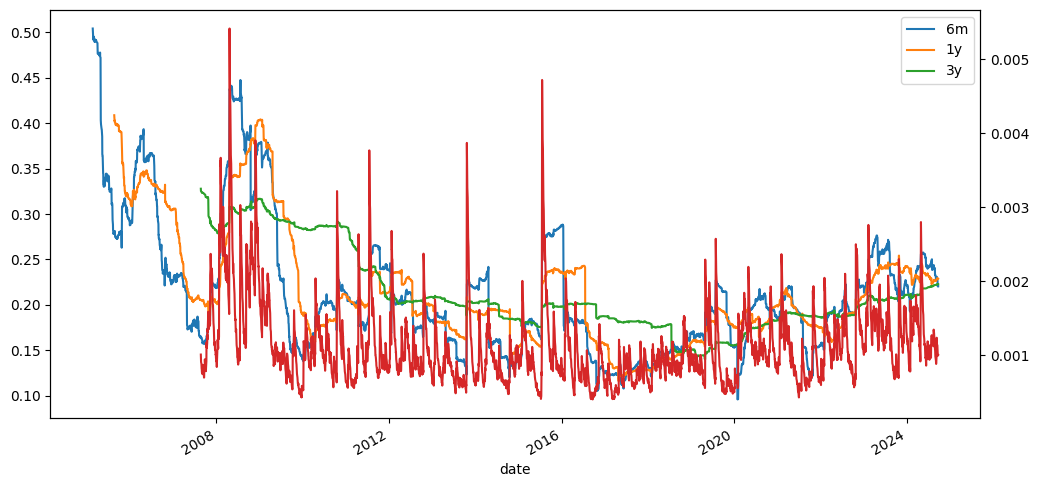

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
this_capm_6m.set_index('date')['idio_vol'].plot(ax=axes, label='6m')
this_capm_1y.set_index('date')['idio_vol'].plot(ax=axes, label='1y')
this_capm_3y.set_index('date')['idio_vol'].plot(ax=axes, label='3y')
this_capm_ewma.set_index('date')['idio_vol'].plot(ax=axes, label='ewma', secondary_y=True)
axes.legend()
plt.show()

In [95]:
df = utils.check_recent_filings(start_date='2024-09-20',
                                filter_list=tickers_sp500)
df








,title,date,link,cik,form_type,ticker,done
0,"10-Q - DELTA AIR LINES, INC. (0000027904) (Filer)",2024-10-10 16:16:49,https://www.sec.gov/Archives/edgar/data/27904/...,0000027904,10-Q,DAL,True
1,10-K - Accenture plc (0001467373) (Filer),2024-10-10 06:43:59,https://www.sec.gov/Archives/edgar/data/146737...,0001467373,10-K,ACN,True
2,10-Q - DOMINOS PIZZA INC (0001286681) (Filer),2024-10-10 06:15:20,https://www.sec.gov/Archives/edgar/data/128668...,0001286681,10-Q,DPZ,True
3,10-K - COSTCO WHOLESALE CORP /NEW (0000909832)...,2024-10-08 18:40:07,https://www.sec.gov/Archives/edgar/data/909832...,0000909832,10-K,COST,True
4,10-Q - PEPSICO INC (0000077476) (Filer),2024-10-07 17:46:04,https://www.sec.gov/Archives/edgar/data/77476/...,0000077476,10-Q,PEP,True
5,"10-Q - NIKE, Inc. (0000320187) (Filer)",2024-10-07 16:20:15,https://www.sec.gov/Archives/edgar/data/320187...,0000320187,10-Q,NKE,True
6,10-K - MICRON TECHNOLOGY INC (0000723125) (Filer),2024-10-04 16:12:50,https://www.sec.gov/Archives/edgar/data/723125...,0000723125,10-K,MU,True
7,10-Q - CINTAS CORP (0000723254) (Filer),2024-10-04 14:51:19,https://www.sec.gov/Archives/edgar/data/723254...,0000723254,10-Q,CTAS,True
8,"10-Q - CONSTELLATION BRANDS, INC. (0000016918)...",2024-10-03 14:00:35,https://www.sec.gov/Archives/edgar/data/16918/...,0000016918,10-Q,STZ,True
9,10-Q - LENNAR CORP /NEW/ (0000920760) (Filer),2024-10-02 16:31:24,https://www.sec.gov/Archives/edgar/data/920760...,0000920760,10-Q,LEN,True


In [2]:
df = utils.download_stock_returns(ticker='AAPL')
df

,ticker,date,adjClose,volume,total_return
0,AAPL,1990-01-02,0.26241,183198580,NaN
1,AAPL,1990-01-03,0.26417,207995404,0.006707
2,AAPL,1990-01-04,0.26505,221513820,0.003331
3,AAPL,1990-01-05,0.26593,124006524,0.003320
4,AAPL,1990-01-08,0.26769,101572899,0.006618
...,...,...,...,...,...
8777,AAPL,2024-11-04,222.01000,44944500,-0.004038
8778,AAPL,2024-11-05,223.45000,28111338,0.006486
8779,AAPL,2024-11-06,222.72000,54561121,-0.003267
8780,AAPL,2024-11-07,227.48000,42137691,0.021372
